## Process the image data 

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import io, measure, exposure
from skimage.color import rgba2rgb, rgb2gray
from skimage.feature import greycomatrix, greycoprops

from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import os
import csv
import random

%matplotlib inline

In [22]:
print(skimage.__version__)

0.17.2


# Flatten iamges

In [23]:
def extract_features(image_input):
    gray =  rgb2gray(image_input)
    v1 = image_input.flatten()
    
    v = np.concatenate([v1])
    
    return v

In [24]:
directory = "Border_aug/"

border_features = []

for filename in os.listdir(directory):
    if filename.endswith(".png"):
        image = io.imread(directory + filename)
        v = extract_features(image)
        v_list = [filename, 0] + v.tolist()
        border_features.append(v_list)

In [25]:
directory = "Center_aug/"

center_features = []

for filename in os.listdir(directory):
    if filename.endswith(".png"):
        image = io.imread(directory + filename)
        v = extract_features(image)
        v_list = [filename, 1] + v.tolist()
        center_features.append(v_list)

In [26]:
directory = "Blank_aug/"
blank_features = []

for filename in os.listdir(directory):
    if filename.endswith(".png"):
        image = io.imread(directory + filename)
        v = extract_features(image)
        v_list = [filename, 2] + v.tolist()
        blank_features.append(v_list)

In [27]:
features = []
labels = []

for row in border_features:
    filename = row[0]
    class_label = row[1]
    v = np.array(row[2:len(row)], dtype=np.float32)
    f = [filename, class_label, v]
    features.append(f)
    labels.append(class_label)

In [28]:
for row in center_features:
    filename = row[0]
    class_label = row[1]
    v = np.array(row[2:len(row)], dtype=np.float32)
    f = [filename, class_label, v]
    features.append(f)
    labels.append(class_label)

In [29]:
for row in blank_features:
    filename = row[0]
    class_label = row[1]
    v = np.array(row[2:len(row)], dtype=np.float32)
    f = [filename, class_label, v]
    features.append(f)
    labels.append(class_label)

### Step 2: Split the data into training and testing

In [30]:
feature_length = len(features[0][2])
features, labels = shuffle(features, labels, random_state=0)

In [31]:
N_train = 60
features_train = features[0:N_train]
features_test = features[N_train:len(features)]

labels_train = labels[0:N_train]
labels_test = labels[N_train:len(features)]

In [32]:
data_train = np.zeros((len(features_train), feature_length))
data_test  = np.zeros((len(features_test), feature_length))

In [33]:
for i in range(0, len(features_train)):
    data_train[i, :] = features_train[i][2]
    
for i in range(0, len(features_test)):
    data_test[i, :] = features_test[i][2]

### Step 3: Set up the classifier and train it


In [63]:
clf = SVC(random_state=0, max_iter=500,kernel = "sigmoid")
#"linear","poly","rbf","sigmoid"

In [64]:
clf.fit(data_train, np.asarray(labels_train))

SVC(max_iter=500, random_state=0)

In [65]:
prediction = clf.predict(data_test)

In [66]:
print(classification_report(labels_test, prediction))

              precision    recall  f1-score   support

           0       0.53      0.39      0.45       481
           1       0.75      0.15      0.25       486
           2       0.44      0.93      0.60       472

    accuracy                           0.49      1439
   macro avg       0.57      0.49      0.43      1439
weighted avg       0.58      0.49      0.43      1439



In [67]:

print(classification_report(labels_test,prediction))
print("train_dataset：", clf.score(data_train, labels_train))
print("test_dataset：", clf.score(data_test, labels_test))
confusion_matrix = confusion_matrix(labels_test,prediction)
print(confusion_matrix) 

              precision    recall  f1-score   support

           0       0.53      0.39      0.45       481
           1       0.75      0.15      0.25       486
           2       0.44      0.93      0.60       472

    accuracy                           0.49      1439
   macro avg       0.57      0.49      0.43      1439
weighted avg       0.58      0.49      0.43      1439

train_dataset： 0.9833333333333333
test_dataset： 0.4857539958304378


TypeError: 'numpy.ndarray' object is not callable

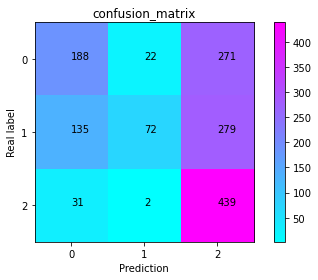

In [68]:
classes = ['0','1','2']
confusion_matrix = np.array(confusion_matrix,dtype=int)

plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.cool)  
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = confusion_matrix.max() / 2.

iters = np.reshape([[[i,j] for j in range(3)] for i in range(3)],(confusion_matrix.size,2))
for i, j in iters:
    plt.text(j, i, format(confusion_matrix[i, j])) 

plt.ylim(len(confusion_matrix) - 0.5,-0.5)
plt.ylabel('Real label')
plt.xlabel('Prediction')
plt.tight_layout()
plt.show()

In [20]:
def predict(args):
    # load the trained convolutional neural network
    print("[INFO] loading network...")
    model = load_model(args["model"])
    stride = args['stride']
    for n in range(len(TEST_SET)):
        path = TEST_SET[n]
        #load the image
        image = cv2.imread('./test/' + path)
        # pre-process the image for classification
        #image = image.astype("float") / 255.0
        #image = img_to_array(image)
        h,w,_ = image.shape
        padding_h = (h//stride + 1) * stride 
        padding_w = (w//stride + 1) * stride
        padding_img = np.zeros((padding_h,padding_w,3),dtype=np.uint8)
        padding_img[0:h,0:w,:] = image[:,:,:]
        padding_img = padding_img.astype("float") / 255.0
        padding_img = img_to_array(padding_img)
        print 'src:',padding_img.shape
        mask_whole = np.zeros((padding_h,padding_w),dtype=np.uint8)
        for i in range(padding_h//stride):
            for j in range(padding_w//stride):
                crop = padding_img[:3,i*stride:i*stride+image_size,j*stride:j*stride+image_size]
                _,ch,cw = crop.shape
                if ch != 256 or cw != 256:
                    print 'invalid size!'
                    continue
                    
                crop = np.expand_dims(crop, axis=0)
                #print 'crop:',crop.shape
                pred = model.predict_classes(crop,verbose=2)  
                pred = labelencoder.inverse_transform(pred[0])  
                #print (np.unique(pred))  
                pred = pred.reshape((256,256)).astype(np.uint8)
                #print 'pred:',pred.shape
                mask_whole[i*stride:i*stride+image_size,j*stride:j*stride+image_size] = pred[:,:]
 
        
        cv2.imwrite('./predict/pre'+str(n+1)+'.png',mask_whole[0:h,0:w])

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('src:',padding_img.shape)? (<ipython-input-20-98543d576720>, line 20)